In [1]:
import torch
import re
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from utils import *

# Load Augmented Embeddings

In [3]:
aug_nas = torch.load('./embs/mlp_nas.pt')
aug_sa = torch.load('./embs/mlp_sa.pt')
aug_lis = torch.load('./embs/mlp_lis.pt')
aug_lissa = torch.load('./embs/mlp_lissa.pt')
aug_ir1 = torch.load('./embs/mlp_ir1.pt')
aug_ir2 = torch.load('./embs/mlp_ir2.pt')
aug_nassa = torch.load('./embs/mlp_nassa.pt')

aug_sup = torch.load("./embs/mlp_sup.pt")

# aug_nssup = torch.load("./embs/mlp_nssup.pt")
# aug_npsup = torch.load("./embs/mlp_npsup.pt")
# aug_othersup = torch.load("./embs/mlp_othersup.pt")

In [4]:
all_aug_embs = torch.cat([aug_nas, aug_sa, aug_lis, aug_lissa, aug_ir1, aug_ir2, aug_sup, aug_nassa])
aug_compare_embs = torch.cat([aug_nas, aug_sa, aug_lis, aug_lissa, aug_ir1, aug_ir2, aug_sup])
embs_np = all_aug_embs.detach().numpy()
all_aug_embs.shape

torch.Size([3679, 128])

In [5]:
l_nas = np.array(['nas' for _ in range(aug_nas.shape[0])])
l_sa = np.array(['sa' for _ in range(aug_sa.shape[0])])
l_lis = np.array(['lis' for _ in range(aug_lis.shape[0])])
l_lissa = np.array(['lissa' for _ in range(aug_lissa.shape[0])])
l_ir1 = np.array(['ir1' for _ in range(aug_ir1.shape[0])])
l_ir2 = np.array(['ir2' for _ in range(aug_ir2.shape[0])])
l_sup = np.array(['sup' for _ in range(aug_sup.shape[0])])
l_nassa = np.array(['nassa' for _ in range(aug_nassa.shape[0])])
# l_nssup = np.array(['nssup' for _ in range(aug_nssup.shape[0])])
# l_npsup = np.array(['npsup' for _ in range(aug_npsup.shape[0])])
# l_othersup = np.array(['othersup' for _ in range(aug_othersup.shape[0])])

## Add more data

In [6]:
sup_df = pd.read_csv("./abs_data/supplied_abs.csv")
nssup_df, nssup_list = load_csv_abstracts("./abs_data/ns_supply_more.csv")
npsup_df, npsup_list = load_csv_abstracts("./abs_data/np_supply_more.csv")
othersup_df, othersup_list = load_csv_abstracts("./abs_data/other_supply_more.csv")

In [7]:
# new_sup_df = pd.concat([nssup_df, npsup_df, othersup_df], axis=0)
# new_sup_df.reset_index(inplace=True, drop=True)
# l_nssup = np.array(['ns-sup' for _ in range(aug_nssup.shape[0])])
# l_npsup = np.array(['np-sup' for _ in range(aug_npsup.shape[0])])
# l_othersup = np.array(['other-sup' for _ in range(aug_othersup.shape[0])])
# temp = pd.DataFrame(np.concatenate((l_nssup, l_npsup, l_othersup), axis=0), columns=['class'])
# new_sup_df = pd.concat([new_sup_df, temp], axis=1, ignore_index=False)

In [8]:
labels = np.concatenate((l_nas, l_sa, l_lis, l_lissa, l_ir1, l_ir2, l_sup, l_nassa), axis=0)
labels.shape

(3679,)

In [9]:
labels

array(['nas', 'nas', 'nas', ..., 'nassa', 'nassa', 'nassa'], dtype='<U5')

In [10]:
nas_csv_file = "./abs_data/TITLE-ABS-KEY ( room-temperature AND sodium-sulfur AND batteries ) AND ( DOCTYPE ( ar ) )_1.csv"
lis_csv_file = "./abs_data/TITLE-ABS-KEY (  lithium-sulfur AND electrocatalysts) AND ( DOCTYPE ( ar ) )_1.csv"
sa_csv_file = "./abs_data/TITLE-ABS-KEY ( single-atom AND electrocatalysts ) AND ( DOCTYPE ( ar ) )_1.csv"
lissa_csv_file = r"./abs_data/Li-S SA_1.csv"
irrelevant1_csv_file = r'./abs_data/Low_relevant_1.csv'
irrelevant2_csv_file = r'./abs_data/Low_relevant_2.csv'
nas_df, nas_list = load_csv_abstracts(nas_csv_file)
lis_df, lis_list = load_csv_abstracts(lis_csv_file)
lissa_df, lissa_list = load_csv_abstracts(lissa_csv_file)
sa_df, sa_list = load_csv_abstracts(sa_csv_file)
ir1_df, ir1_list = load_csv_abstracts(irrelevant1_csv_file)
ir2_df, ir2_list = load_csv_abstracts(irrelevant2_csv_file)

check_duplicate_df = pd.concat([sa_df, lis_df, lissa_df])
check_series = check_duplicate_df.duplicated(subset='doi', keep='last')
sa_check_series = check_series[:sa_df.shape[0]]
lis_check_series = check_series[sa_df.shape[0]:sa_df.shape[0] + lis_df.shape[0]]
lissa_check_series = check_series[-lissa_df.shape[0]:]
del check_duplicate_df

def remove_duplicate(check_series, df, abs_list):
    print(check_series.value_counts())
    new_df = df[check_series==False]
    new_list = [] 
    for check, abs in zip(check_series, abs_list):
        if check == False:
            new_list.append(abs)
    return new_df, new_list
sa_df, sa_list = remove_duplicate(sa_check_series, sa_df, sa_list)
lis_df, lis_list = remove_duplicate(lis_check_series, lis_df, lis_list)
lissa_df, lissa_list = remove_duplicate(lissa_check_series, lissa_df, lissa_list)

False    1198
True       20
dtype: int64
False    297
True      15
dtype: int64
False    81
dtype: int64


In [11]:
# all_df = pd.concat([nas_df, sa_df, lis_df, lissa_df, ir1_df, ir2_df], axis=0)
# all_df.reset_index(inplace=True, drop=True)
# print(all_df.shape)
# all_df.to_csv("./abs_data/all_abs_wo_nasa.csv", index=False)

In [12]:
all_df = pd.concat([nas_df, nssup_df, npsup_df, othersup_df, sa_df, lis_df, lissa_df, ir1_df, ir2_df, sup_df], axis=0)
all_df.reset_index(inplace=True, drop=True)
temp = pd.DataFrame(np.concatenate((l_nas, l_sa, l_lis, l_lissa, l_ir1, l_ir2, l_sup), axis=0), columns=['class'])
all_df_with_class = pd.concat([all_df, temp], axis=1, ignore_index=False)

In [18]:
all_df_with_class.to_csv("./abs_data/all_abs_wo_nasa_v1.csv", index=False)

In [14]:
all_df_with_class.shape

(3674, 6)

# Clustering

In [15]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

dimension reduction

In [16]:
tsne = TSNE(n_components=2)
embs_tsne = tsne.fit_transform(embs_np)

k-means

In [17]:
k = 7
kmeans = KMeans(n_clusters=k)
predicts = kmeans.fit_predict(embs_np)

In [18]:
predicts.shape

(3679,)

In [19]:
df_temp = pd.DataFrame(embs_tsne, columns=['dim1', 'dim2'])
df_predicts = pd.DataFrame(predicts, columns=['cluster'])
df_kmeans = pd.concat([df_temp, df_predicts], axis=1, ignore_index=False)

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

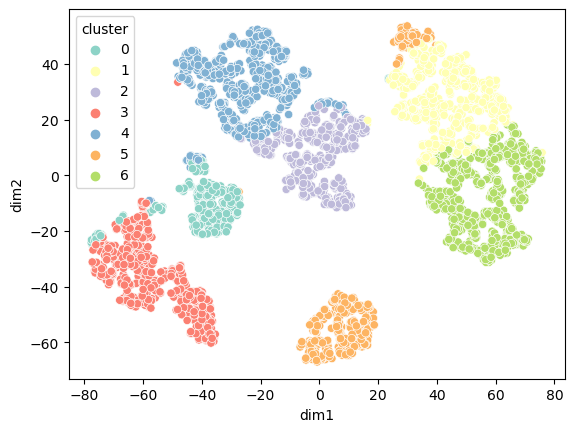

In [20]:
sns.scatterplot(data=df_kmeans, hue='cluster', x='dim1', y='dim2', palette="Set3")

True labels

In [21]:
df_temp = pd.DataFrame(embs_tsne, columns=['dim1', 'dim2'])
df_label = pd.DataFrame(labels, columns=['class'])
df_tsne = pd.concat([df_temp, df_label], axis=1, ignore_index=False)

In [22]:
df_tsne.to_csv("./save_files/mlp_tsne_sup.csv")

In [23]:
df_tsne.head()

,dim1,dim2,class
0,-39.931927,-16.083773,nas
1,-34.764950,-19.560507,nas
2,-28.728632,-12.668932,nas
3,-36.428059,-19.184504,nas
4,-48.085571,35.565182,nas


In [24]:
df_tsne.shape

(3679, 3)

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

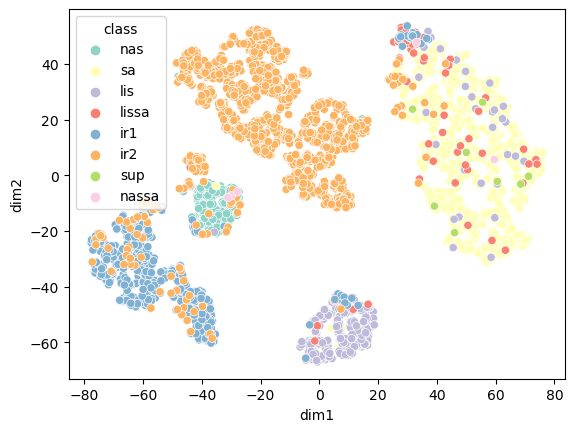

In [25]:
sns.scatterplot(data=df_tsne, hue='class', x='dim1', y='dim2', palette='Set3')

In [26]:
# 3d tsne
tsne = TSNE(n_components=3)
embs_tsne = tsne.fit_transform(embs_np)
df_temp = pd.DataFrame(embs_tsne, columns=['dim1', 'dim2', 'dim3'])
df_label = pd.DataFrame(labels, columns=['class'])
df_tsne = pd.concat([df_temp, df_label], axis=1, ignore_index=False)
df_tsne.to_csv("./save_files/mlp_tsne_3d.csv")

# Top-K Abstracts

In [27]:
# def create_similarities_df_with_doi(compared_df, emb_list_aim, emb_list_compared, K):
#     topk = get_top_k(emb_list_aim, emb_list_compared, K)
#     df_list = []
#     for key in topk.keys():
#         idx_list = [key for _ in range(K)]
#         temp_df = compared_df[['class', 'title', 'doi']].iloc[topk[key]]
#         temp_df = temp_df.reset_index(drop= True)
#         id_df = pd.DataFrame({'id':idx_list})
#         df = pd.concat([id_df, temp_df], axis=1)
#         df_list.append(df)
#     return pd.concat(df_list)

In [15]:
def get_similarities_new(embs_1, embs_2):
    similarities = torch.mm(embs_1, embs_2.T)
    norm_1 = torch.norm(embs_1, dim=1)
    norm_2 = torch.norm(embs_2, dim=1)
    norms = torch.mm(norm_1.view(-1, 1), norm_2.view(1, -1))
    similarities = similarities / norms
    similarities_dict = {}
    for i in range(similarities.shape[0]):
        similarities_dict[i] = similarities[i].tolist()

    return similarities_dict

In [16]:
def create_similarities_df_with_doi(compared_df, emb_list_aim, emb_list_compared, K=None):
    sim = get_similarities_new(emb_list_aim, emb_list_compared)
    topk = {}

    print("Calculating topk...")
    
    if K is not None:
        for key in sim.keys():
            topk[key] = get_pair_ranks(sim[key])[:K]
    else:
        for key in sim.keys():
            topk[key] = get_pair_ranks(sim[key])

    print("Constructing df...")
    df_list = []
    for key in topk.keys():
        idx_length = len(emb_list_compared) if K is None else K
        idx_list = [key for _ in range(idx_length)]
        temp_df = compared_df[['class', 'title', 'doi']].iloc[topk[key]]
        temp_df = temp_df.reset_index(drop= True)

        sorted_sim = []
        for id in topk[key]:
            sorted_sim.append(sim[key][id])
        sim_df = pd.DataFrame({'sim': sorted_sim})
        id_df = pd.DataFrame({'id':idx_list})
        df = pd.concat([id_df, temp_df, sim_df], axis=1)
        df_list.append(df)
    return pd.concat(df_list)

In [17]:
k = 31

In [54]:
# fetch all abstracts top-30
aug_all_embs = torch.cat([aug_compare_embs, aug_nassa])
compare_all_df = create_similarities_df_with_doi(all_df_with_class, aug_compare_embs, aug_compare_embs, k)
compare_all_df.to_csv('./save_files/all_sim_wo_nassa.csv', index=False)

Calculating topk...
Constructing df...


In [28]:
compare_all_df = create_similarities_df_with_doi(all_df_with_class, aug_nassa, aug_compare_embs, k)
compare_all_df.to_csv('./save_files/aug_nassa_top30.csv', index=False)

In [68]:
# aug_compare_embs_with_sup = torch.cat([aug_compare_embs, aug_sup])
# aug_compare_embs_with_sup.shape

torch.Size([3643, 128])

In [19]:
# all_df_with_sup = pd.concat([all_df, new_sup_df, sup_df], axis=0)
all_df_with_sup = pd.concat([all_df, sup_df], axis=0)
all_df_with_sup.reset_index(inplace=True, drop=True)
all_df_with_sup.shape

(3674, 5)

In [20]:
# aug_compare_embs_with_sup = torch.cat([aug_compare_embs, aug_nssup, aug_npsup, aug_othersup, aug_sup])
aug_compare_embs_with_sup = torch.cat([aug_compare_embs, aug_sup])
aug_compare_embs_with_sup.shape

torch.Size([3674, 128])

In [24]:
compare_all_df_with_sup = create_similarities_df_with_doi(all_df_with_sup, aug_nassa, aug_compare_embs_with_sup, k)
compare_all_df_with_sup.to_csv('./save_files/new_aug_nassa_with_sup_top30.csv', index=False)

In [25]:
compare_all_df_with_sup = create_similarities_df_with_doi(all_df_with_sup, aug_nassa, aug_compare_embs_with_sup, K=10)
compare_all_df_with_sup.to_csv('./save_files/new_aug_nassa_with_sup_top10.csv', index=False)

In [26]:
compare_all_df_with_sup = create_similarities_df_with_doi(all_df_with_sup, aug_nassa, aug_compare_embs_with_sup, K=50)
compare_all_df_with_sup.to_csv('./save_files/new_aug_nassa_with_sup_top50.csv', index=False)

In [27]:
compare_all_df_with_sup = create_similarities_df_with_doi(all_df_with_sup, aug_nassa, aug_compare_embs_with_sup)
compare_all_df_with_sup.to_csv('./save_files/new_aug_nassa_with_sup_all.csv', index=False)

retrieve similarities

In [18]:
sim = get_similarities(aug_nassa, aug_compare_embs_with_sup)

In [19]:
sorted_id = {}
for key in sim.keys():
    sorted_id[key] = get_pair_ranks(sim[key])